✅ Dataset generado:
   lluvia_mm  temp_max  temp_min  humedad  pH_suelo  dia_del_ano  \
0        2.0        32        20       75       6.8          100   
1        5.0        34        22       80       6.5          120   
2       20.0        25        18       92       6.2          150   
3       12.0        28        19       90       6.0          180   
4        9.0        31        21       70       5.0          200   
5       25.0        24        17       95       4.5          220   
6        1.5        35        23       60       5.2          250   
7        8.0        33        20       88       6.3          270   
8       30.0        22        16       97       5.4          300   
9        3.0        30        19       85       5.1          320   

   recomendacion  
0          riego  
1          riego  
2          riego  
3          riego  
4          riego  
5  fertilizacion  
6          riego  
7          riego  
8  fertilizacion  
9  fertilizacion  


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275 (1.07 KB)

 Trainable params: 275 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2000 - loss: 15.5115 - val_accuracy: 0.0000e+00 - val_loss: 18.7321
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2000 - loss: 14.9334 - val_accuracy: 0.0000e+00 - val_loss: 17.8967
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2000 - loss: 14.3629 - val_accuracy: 0.0000e+00 - val_loss: 17.0847
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2000 - loss: 13.7953 - val_accuracy: 0.0000e+00 - val_loss: 16.2748
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2000 - loss: 13.2307 - val_accuracy: 0.0000e+00 - val_loss: 15.4669
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.2000 - loss: 12.6689 - val_accuracy: 0.0000e+00 - val_loss: 14.6402
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.2000 - loss: 12.1101 - val_accuracy: 0.0000e+00 - val_loss: 13.7471
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.2000 - loss: 11

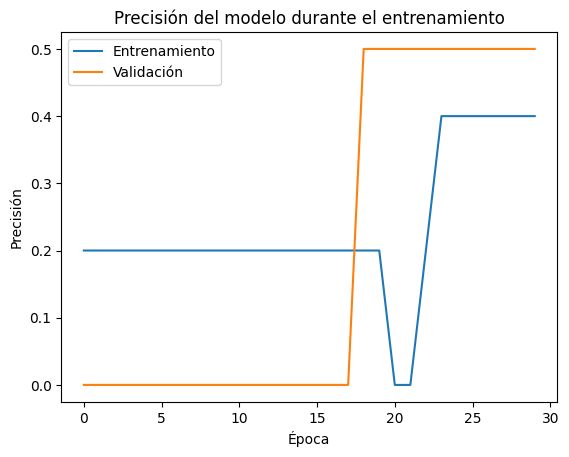

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Dataset sintético con reglas simples
data = {
    "lluvia_mm":     [2.0, 5.0, 20.0, 12.0, 9.0, 25.0, 1.5, 8.0, 30.0, 3.0],
    "temp_max":      [32, 34, 25, 28, 31, 24, 35, 33, 22, 30],
    "temp_min":      [20, 22, 18, 19, 21, 17, 23, 20, 16, 19],
    "humedad":       [75, 80, 92, 90, 70, 95, 60, 88, 97, 85],
    "pH_suelo":      [6.8, 6.5, 6.2, 6.0, 5.0, 4.5, 5.2, 6.3, 5.4, 5.1],
    "dia_del_ano":   [100, 120, 150, 180, 200, 220, 250, 270, 300, 320]
}

df = pd.DataFrame(data)

# Reglas de clasificación
def recomendar(row):
    if row['lluvia_mm'] < 10 and row['temp_max'] > 30:
        return 'riego'
    elif row['pH_suelo'] < 5.5:
        return 'fertilizacion'
    elif row['humedad'] > 90 and row['temp_max'] > 28:
        return 'poda_preventiva'
    else:
        return 'riego'  # por defecto

df['recomendacion'] = df.apply(recomendar, axis=1)
print("✅ Dataset generado:")
print(df)

# Preprocesamiento
X = df.drop("recomendacion", axis=1)
y = df["recomendacion"]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenamiento
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("✅ Reporte de clasificación:")
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))


model.save("../models/ann_recomendador.keras")
print("✅ Modelo guardado como ann_recomendador.keras")


plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.title("Precisión del modelo durante el entrenamiento")
plt.legend()
plt.show()
